In [1]:
from blitz_env.simulate_draft_sqlite import init_database
init_database(2024)

OperationalError: (sqlite3.OperationalError) no such table: stats.season_stats
[SQL: 
                CREATE TABLE season_stats AS
                SELECT * FROM stats.season_stats
                WHERE year < ? AND year >= ?
            ]
[parameters: (2024, 2022)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

### Datasette

Datasette is a sqlite visual explorer.  `make launch-simulator` should have already kicked off an instance running at [http://127.0.0.1:8001/](http://127.0.0.1:8001/).  

If not, you can run an instance from terminal with `datasette draft.db`

## Pandas

Here is some helper code for exploring the data with pandas

In [2]:
from blitz_env.models import DatabaseManager
import pandas as pd

db = DatabaseManager()
df = pd.read_sql("SELECT * FROM players", db.engine)
df

,id,full_name,professional_team,player_bye_week,rank,tier,position_rank,position_tier,gsis_id,allowed_positions,availability,pick_chosen,current_bot_id
0,19788,Ja'Marr Chase,CIN,10,1,1,1,1,00-0036900,"[""WR""]",AVAILABLE,None,None
1,23133,Bijan Robinson,ATL,5,2,1,1,1,00-0038542,"[""RB""]",AVAILABLE,None,None
2,19202,CeeDee Lamb,DAL,10,3,1,2,1,00-0036358,"[""WR""]",AVAILABLE,None,None
3,19236,Justin Jefferson,MIN,6,4,1,3,1,00-0036322,"[""WR""]",AVAILABLE,None,None
4,22968,Jahmyr Gibbs,DET,8,5,1,2,1,00-0039139,"[""RB""]",AVAILABLE,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,25334,Derius Davis,LAC,12,514,16,163,11,00-0038573,"[""WR""]",AVAILABLE,None,None
514,18714,Scotty Miller,PIT,5,515,16,173,11,00-0035298,"[""WR""]",AVAILABLE,None,None
515,23798,Hassan Haskins,LAC,12,516,16,129,10,00-0037617,"[""RB""]",AVAILABLE,None,None
516,16743,Johnny Mundt,JAC,8,517,16,63,8,00-0033246,"[""TE""]",AVAILABLE,None,None


## Example Draft

In [4]:
from blitz_env.simulate_draft_sqlite import simulate_draft, visualize_draft_board
from blitz_env.models import DatabaseManager, Player

def draft_player() -> str:
    db = DatabaseManager()
    try:
        # First, try to get the best available QB
        best_qb = db.session.query(Player).filter(
            Player.availability == 'AVAILABLE',
            Player.allowed_positions.contains("QB"),
        ).order_by(Player.rank).first()
        
        if best_qb:
            return best_qb.id
        
        # If no QBs available, get best overall player
        best_player = db.session.query(Player).filter(
            Player.availability == 'AVAILABLE'
        ).order_by(Player.rank).first()
        
        return best_player.id if best_player else ""
    finally:
        db.close()

# Run the draft simulation - data is stored in SQLite database
season = 2025
simulate_draft(draft_player, season)

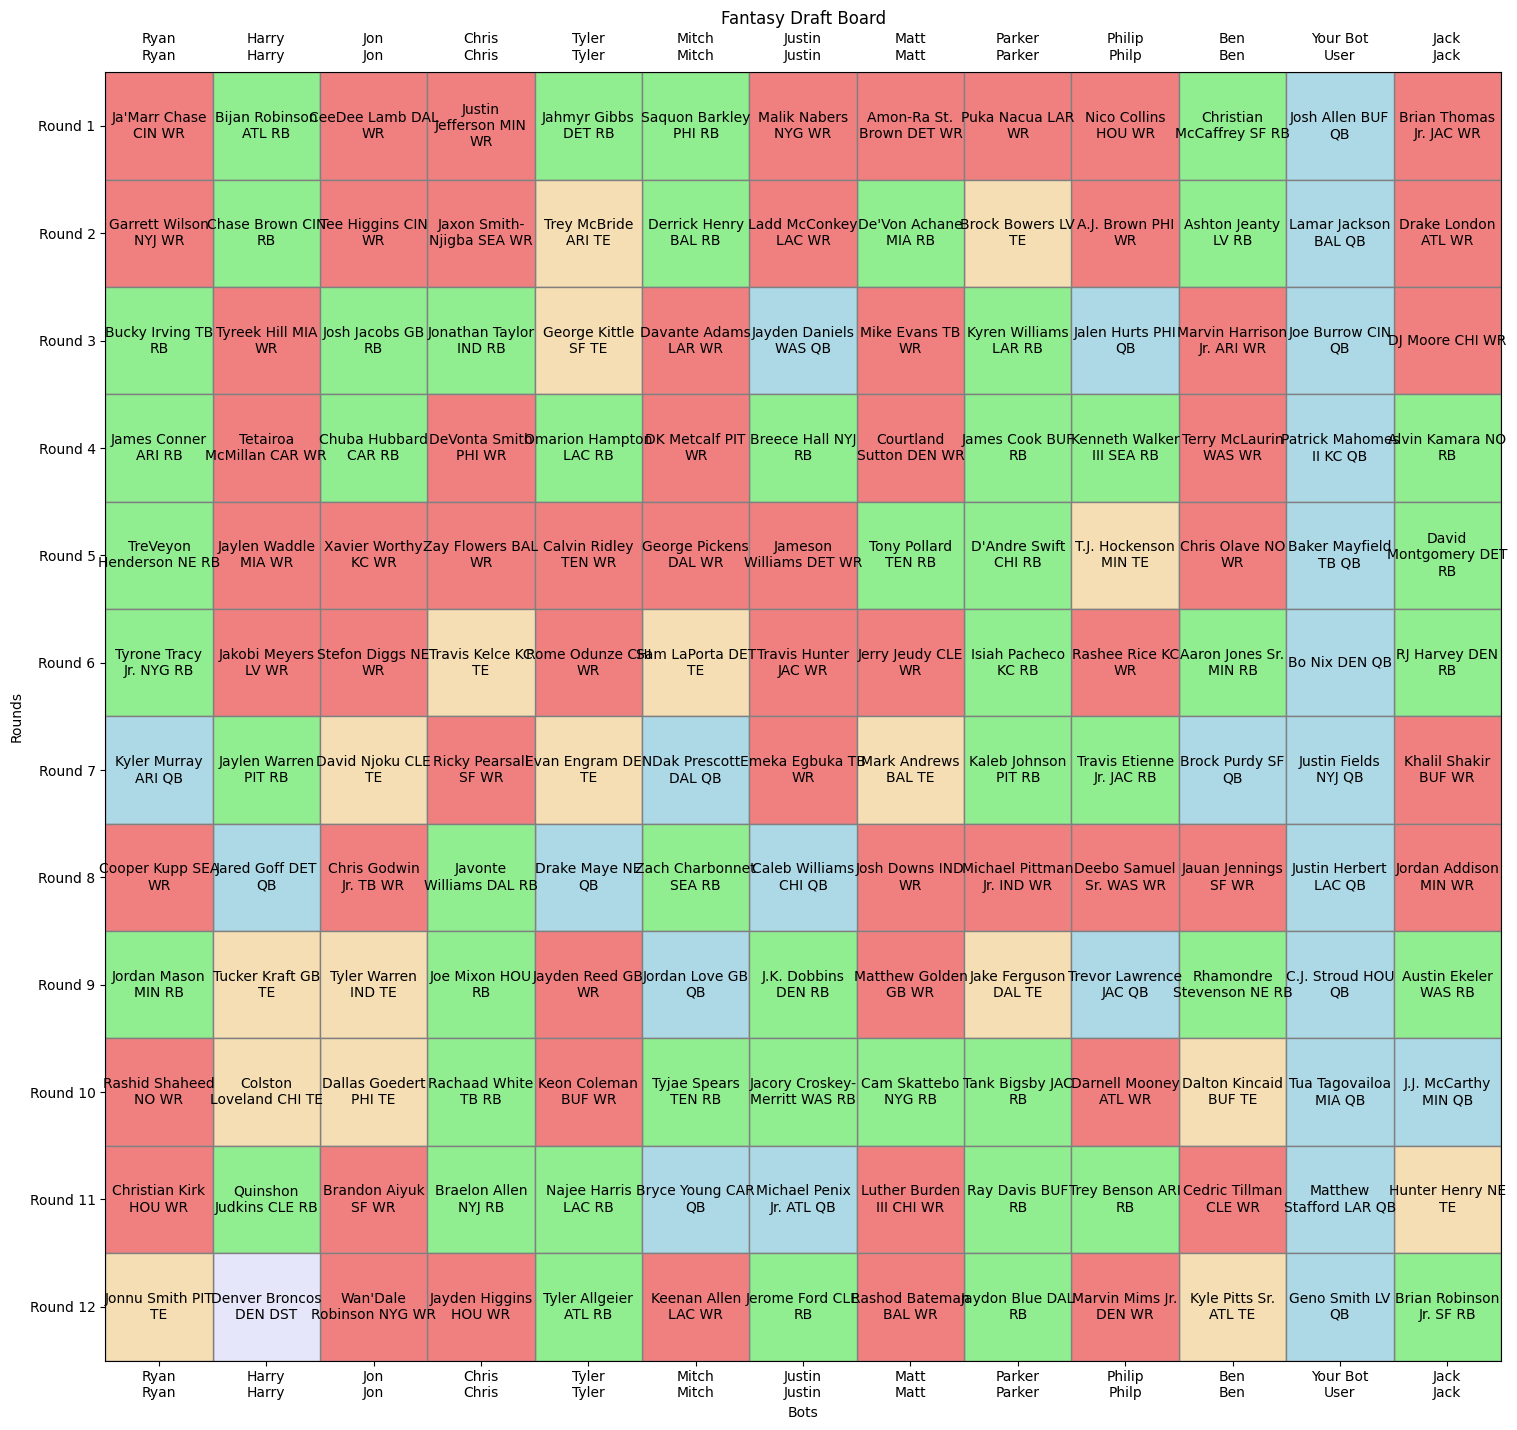

In [6]:
visualize_draft_board()

Downcasting floats.
[('Philp', 2087.3799998760223), ('Matt', 2024.6600074768066), ('Tyler', 1964.8000040054321), ('Jon', 1806.9999990463257), ('Parker', 1756.119997009635), ('Jack', 1748.9000012874603), ('Ben', 1707.340006828308), ('Chris H', 1687.7999956905842), ('Chris', 1486.4999945163727), ('Mitch', 1481.1799999922514), ('Harry', 1450.0999927520752), ('Justin', 1403.7000019103289), ('User', 985.9399967193604)]


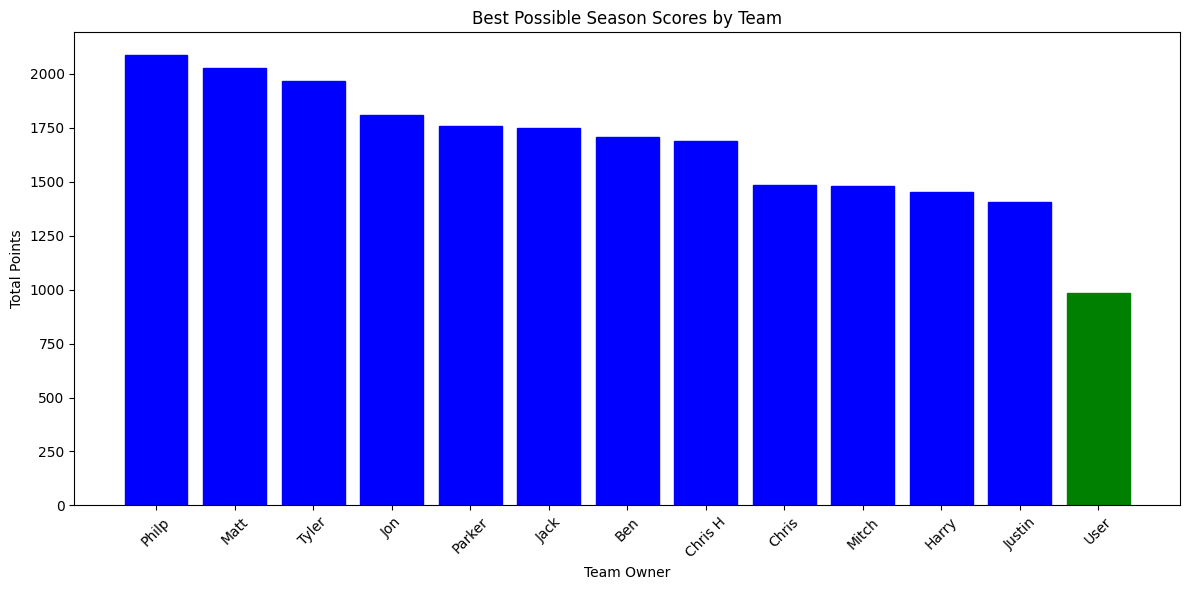

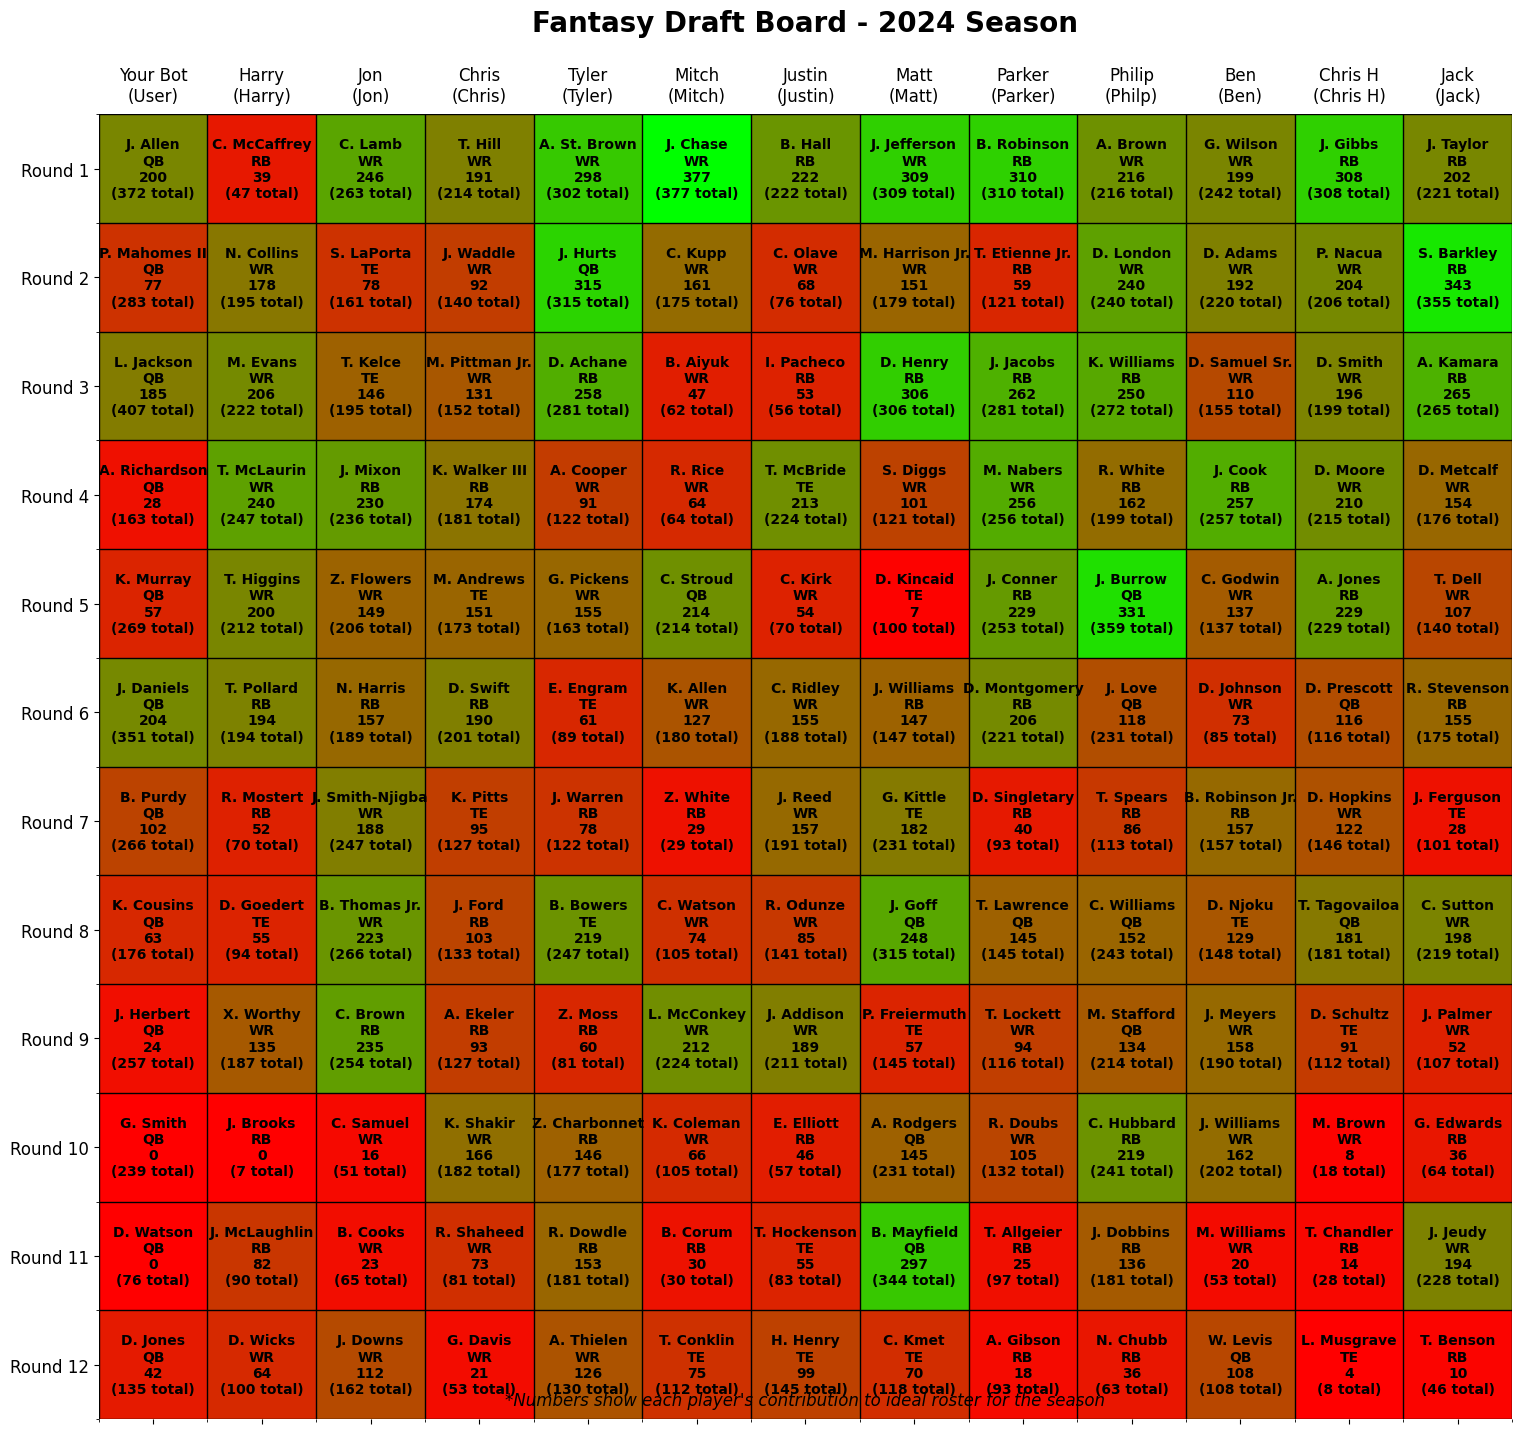

In [6]:
from blitz_env.score_game_sqlite import score_draft_for_visualization

if season < 2025:
    score_draft_for_visualization()